In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%cd '../'

/Users/joe/Documents/boulot/git/homhots/HOTS


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import os
import time

from HOTS.ToolsMonitor import GenerateActivationMap, DisplayActivationMap
from HOTS.Event import Event, SimpleAlphabet, LoadNMNIST
from HOTS.STS import STS
from HOTS.Layer import ClusteringLayer
from HOTS.ToolsMonitor import (
    DisplayImage,
    DisplaySurface3D,
    DisplaySurface2D,
    DisplayConvergence,
    DisplayLayerKernels,
)
from HOTS.Tools import SaveObject, LoadObject
from HOTS.Classifier import Classifier
from HOTS.Network import Network
from HOTS.KmeansLagorce import KmeansLagorce
from HOTS.KmeansMaro import KmeansMaro
from HOTS.conv2eve import conv2eve

tau = 9e-4 # -> tau=1ms, si on prend 10 ms on est à 1s pour la dernière couche et les vidéos font 0.3s en moyenne
R = 2
filthr = 2
nbkNN = 3
algo = 'lagorce'
decay = 'exponential'
hom = True
krnlinit='rdn'
nb_cluster = [4, 8, 16]
ImageSize = (34, 34)
DataPath = 'Data/testsetnmnist.p'

NbClusteringData = 15
NbTrainingData = 40
NbTestingData = 40
_1ofich = False

event_tr, event_te, event_cl, label_tr, label_te = LoadNMNIST(
NbTrainingData, NbTestingData, NbClusteringData, OneOfEach=_1ofich, Path=DataPath, OutOnePolarity=False, ListPolarities=None, verbose=0)

[]


Records/EXP_03_NMNIST/20201021_hots_0.9ms_lagorce.pkl
4 2 5 (4, 50)


ValueError: cannot reshape array of size 200 into shape (5,5)

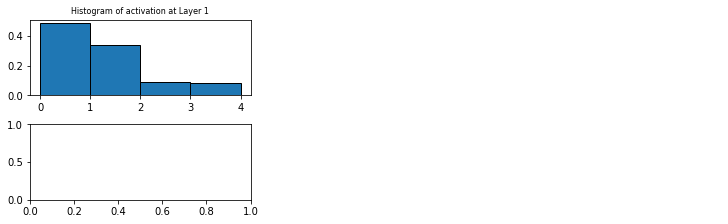

In [15]:
#timestr = time.strftime("%Y%m%d")
hom = False
homrun = False
timestr = '20201021'
if hom==True:
    fname = 'Records/EXP_03_NMNIST/'+timestr+'_hots_'+str(tau*1000)+'ms_'+algo+'_homeo.pkl'
else:
    fname = 'Records/EXP_03_NMNIST/'+timestr+'_hots_'+str(tau*1000)+'ms_'+algo+'.pkl'
print(fname)

L1 = ClusteringLayer(tau=tau,R=R,verbose=0,ThrFilter=filthr,LearningAlgo=algo,kernel=decay,homeo=hom,init=krnlinit)
L2 = ClusteringLayer(tau=10 * tau,R=2 * R,verbose=0,ThrFilter=filthr,LearningAlgo=algo,kernel=decay,homeo=hom,init=krnlinit)
L3 = ClusteringLayer(tau=10 * 10 * tau,R=2 * 2 * R,verbose=0,ThrFilter=filthr,LearningAlgo=algo,kernel=decay,homeo=hom,init=krnlinit)
Net = Network([L1, L2, L3])

if not os.path.isfile(fname):
    ClusterLayer, event_output = Net.TrainCluster(
            event=event_cl, NbClusterList=nb_cluster, to_record=True, NbCycle=1
        )
    SaveObject(ClusterLayer, fname)
else: 
    ClusterLayer, Classif0 = LoadObject(fname)
    
DisplayLayerKernels(ClusterLayer)
    
#DisplaySurface2D(ClusterLayer[0].prototype, nb_polarities=2)
#DisplaySurface2D(ClusterLayer[1].prototype, nb_polarities=4)
#DisplaySurface2D(ClusterLayer[2].prototype, nb_polarities=8)
#DisplayConvergence(ClusterLayer, to_display=["error", "histo"])

In [4]:
homrun = False
event0_o_tr, event0_olz_tr = Net.RunNetwork2(event_tr, NbClusterList=ClusterLayer, homrun=homrun)
        ## Generating histogram for the test samples
event0_o_te, event0_olz_te = Net.RunNetwork2(event_te, NbClusterList=ClusterLayer, homrun=homrun)

In [5]:
#For the first layer

Classif0 = Classifier(
            event0_olz_tr[0], event0_olz_te[0], TrainingLabel=label_tr, GroundTruth=label_te
        )
prediction, accuracy, method = Classif0.HistogramDistance(knn=nbkNN, to_print=True)

battacha:35.0% ### normalized:35.0% ### euclidian:27.500000000000004% ### 


In [6]:
#For the second layer

Classif0 = Classifier(
            event0_olz_tr[1], event0_olz_te[1], TrainingLabel=label_tr, GroundTruth=label_te
        )
prediction, accuracy, method = Classif0.HistogramDistance(knn=nbkNN, to_print=True)

battacha:35.0% ### normalized:35.0% ### euclidian:27.500000000000004% ### 


In [7]:
#For the second layer

Classif0 = Classifier(
            event0_olz_tr[2], event0_olz_te[2], TrainingLabel=label_tr, GroundTruth=label_te
        )
prediction, accuracy, method = Classif0.HistogramDistance(knn=nbkNN, to_print=True)

battacha:42.5% ### normalized:47.5% ### euclidian:42.5% ### 
